In [189]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float, Numeric, Text, func
from sqlalchemy.ext.automap import automap_base


In [190]:
# Create an engine to a SQLite database file
engine = create_engine("sqlite:///hawaii.sqlite")

# Create a connection to the engine
conn = engine.connect()

In [191]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [192]:
# Map measurements class
MEA = Base.classes.measurements

In [193]:
# Map stations classes
STA = Base.classes.stations

In [194]:
# Create a session
session = Session(engine)

In [195]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [196]:
columns2 = inspector.get_columns('stations')
for c in columns2:
    print(c['name'], c['type'])
    

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [197]:
## PRECIPITATION ANALYSIS
import datetime as dt
lastyear = dt.date.today() - dt.timedelta(days=365)
results = session.query(MEA.date, MEA.prcp).filter(MEA.date >= lastyear)

In [198]:
results_list = []
for record in results:
    (date, prcp) = record
    results_list.append(record)
    print(record)

('2017-05-06', 0.0)
('2017-05-07', 0.0)
('2017-05-08', 0.0)
('2017-05-10', 0.0)
('2017-05-11', 0.01)
('2017-05-12', 0.0)
('2017-05-13', 0.0)
('2017-05-14', 0.0)
('2017-05-15', 0.05)
('2017-05-16', 0.01)
('2017-05-17', 0.0)
('2017-05-18', 0.01)
('2017-05-19', 0.0)
('2017-05-20', 0.0)
('2017-05-21', 0.0)
('2017-05-22', 0.0)
('2017-05-23', 0.08)
('2017-05-24', 0.13)
('2017-05-25', 0.15)
('2017-05-27', 0.01)
('2017-05-28', 0.02)
('2017-05-29', 0.0)
('2017-05-30', 0.26)
('2017-05-31', 0.02)
('2017-06-01', 0.0)
('2017-06-02', 0.0)
('2017-06-03', 0.02)
('2017-06-04', 0.0)
('2017-06-05', 0.0)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.0)
('2017-06-10', 0.04)
('2017-06-11', 0.08)
('2017-06-12', 0.02)
('2017-06-13', 0.0)
('2017-06-14', 0.0)
('2017-06-15', 0.0)
('2017-06-16', 0.0)
('2017-06-17', 0.0)
('2017-06-18', 0.05)
('2017-06-19', 0.0)
('2017-06-20', 0.02)
('2017-06-21', 0.0)
('2017-06-22', 0.0)
('2017-06-23', 0.0)
('2017-06-24', 0.06)
('2017-06-25', 0.0)
('

In [199]:
df = pd.DataFrame(results_list).sort_values('date').reset_index(drop=True)
df.head()

,date,prcp
0,2017-05-06,0.00
1,2017-05-06,0.00
2,2017-05-06,0.00
3,2017-05-06,0.06
4,2017-05-06,0.00


In [200]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [201]:
x_labels = np.arange(0, len(df), round(len(df)/10))
x_lab = []
for x in x_labels:
    x_lab.append(df.date[x])
x_lab

['2017-05-06',
 '2017-05-16',
 '2017-05-27',
 '2017-06-06',
 '2017-06-16',
 '2017-06-27',
 '2017-07-08',
 '2017-07-17',
 '2017-07-26',
 '2017-08-08']

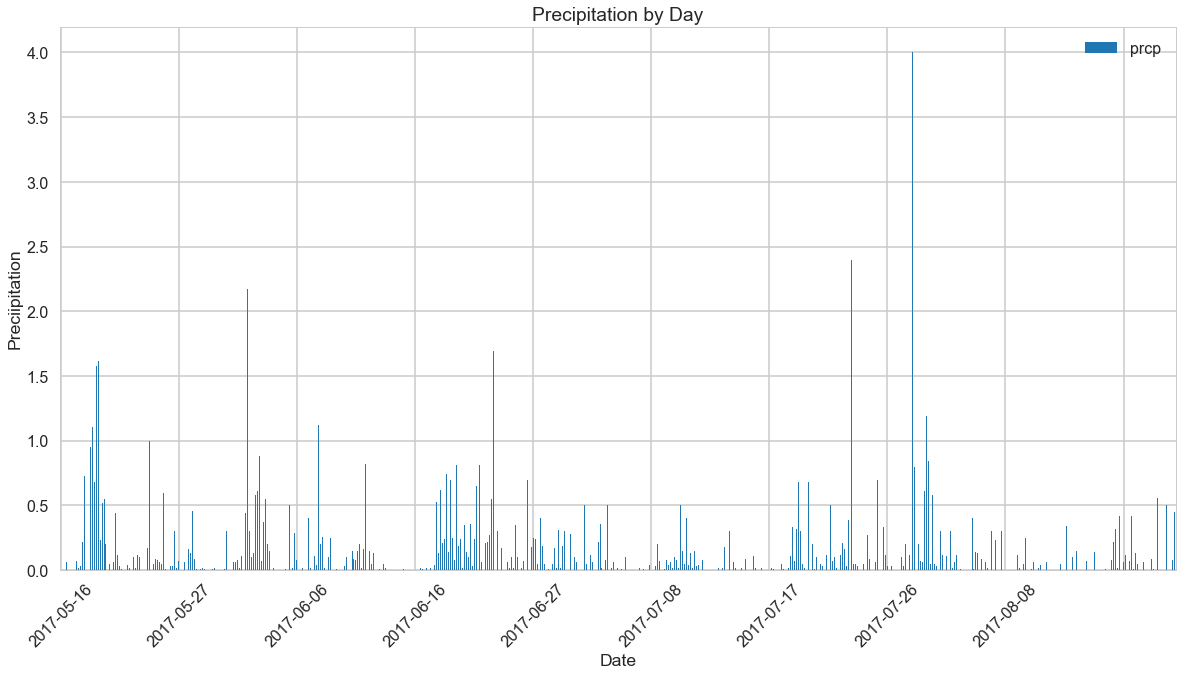

In [202]:
figure = df.plot(kind='bar', figsize=(20,10))
figure.set_xticklabels(x_lab, rotation=45)
figure.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title("Precipitation by Day")
plt.xlabel('Date')
plt.ylabel('Preciipitation')
plt.savefig("Precipitation_by_Day.png")
plt.show()


In [ ]:
### Station Analysis

In [208]:
results2 = session.query(STA.station).count()
print(f"Number of stations: {results2}")

Number of stations: 9


In [219]:
results3 = session.query(STA.station).all()
total_tobs = []
for station in results3:
    total_tobs.append(session.query(func.sum(MEA.tobs)).filter(station == MEA.tobs))

total_tobs
    


In [221]:
results4 = session.query(MEA.date, MEA.tobs).filter(MEA.date >= lastyear).all()
results4

[('2017-05-06', 79),
 ('2017-05-07', 79),
 ('2017-05-08', 77),
 ('2017-05-10', 78),
 ('2017-05-11', 78),
 ('2017-05-12', 79),
 ('2017-05-13', 79),
 ('2017-05-14', 77),
 ('2017-05-15', 78),
 ('2017-05-16', 78),
 ('2017-05-17', 78),
 ('2017-05-18', 73),
 ('2017-05-19', 76),
 ('2017-05-20', 78),
 ('2017-05-21', 76),
 ('2017-05-22', 77),
 ('2017-05-23', 87),
 ('2017-05-24', 77),
 ('2017-05-25', 77),
 ('2017-05-27', 74),
 ('2017-05-28', 76),
 ('2017-05-29', 75),
 ('2017-05-30', 76),
 ('2017-05-31', 79),
 ('2017-06-01', 79),
 ('2017-06-02', 79),
 ('2017-06-03', 79),
 ('2017-06-04', 79),
 ('2017-06-05', 80),
 ('2017-06-06', 79),
 ('2017-06-07', 79),
 ('2017-06-08', 80),
 ('2017-06-09', 80),
 ('2017-06-10', 77),
 ('2017-06-11', 79),
 ('2017-06-12', 83),
 ('2017-06-13', 80),
 ('2017-06-14', 80),
 ('2017-06-15', 78),
 ('2017-06-16', 79),
 ('2017-06-17', 80),
 ('2017-06-18', 77),
 ('2017-06-19', 80),
 ('2017-06-20', 78),
 ('2017-06-21', 79),
 ('2017-06-22', 80),
 ('2017-06-23', 78),
 ('2017-06-24

In [222]:
df4 = pd.DataFrame(results4).sort_values('date').reset_index(drop=True)
df4.head()

,date,tobs
0,2017-05-06,79
1,2017-05-06,79
2,2017-05-06,80
3,2017-05-06,78
4,2017-05-06,75


In [230]:
bins = np.arange(min(df4['tobs']), max(df4['tobs']), 1)
bins

array([66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
       83, 84, 85, 86])

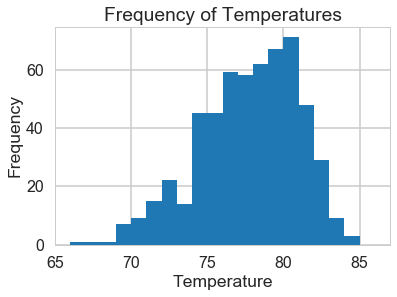

In [242]:
plt.hist(df4['tobs'], bins=bins)
plt.title('Frequency of Temperatures')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.figure(figsize=(20,10))
plt.savefig('Temp_Freq.png')
plt.show()

['2017-05-06',
 '2017-05-16',
 '2017-05-27',
 '2017-06-06',
 '2017-06-16',
 '2017-06-27',
 '2017-07-08',
 '2017-07-17',
 '2017-07-26',
 '2017-08-08']

In [ ]:
figure = df4.plot(kind='bar', figsize=(20,10))
figure.set_xticklabels(x_lab4, rotation=45)
figure.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title("Temperature Observations")
plt.xlabel('Date')
plt.ylabel('Preciipitation')
plt.savefig("Precipitation_by_Day.png")
plt.show()

In [203]:
# import datetime as dt
# prevyr = dt.date.today() - dt.timeelta(days=365)
# results = sessions.query(MEA.date, MEA.prcp).filter(mEA.date >= prevyr)
# df = pd.dataframe(results, columns ={date, precp]).sort_values(date)})

# pd.date_range(df.iloc[0].date, df.iloc[-1].date)).rename(columns={0:'date'})

In [204]:
plotted, rolling mean (moving average or exponential moving average)
df.precipitations.rolling(window=Xobservations).mean().plot(color='orange',alpha)

SyntaxError: invalid syntax (<ipython-input-204-911d605726de>, line 1)